In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)
#from sklearn.metrics import roc_curve, auc
#from scipy import interpolate
#import re

In [2]:
variable_file = "leading__AK8__pt.npy"
triggers = ["AK8PFJet400_MassSD30", "AK8PFJet400_TrimMass30"]

In [3]:
def plotHistograms(datas, variable, bins=100, range=(0,1000)):
    
    f, ax  = plt.subplots()
    
    for label in datas:
        data = datas[label]
        hist_data, hist_bins = np.histogram(data, bins=bins, range=range)
        hep.histplot(hist_data, hist_bins,label=label, ax=ax)
        
    plt.yscale("log")
    plt.ylabel("events")
    plt.xlabel(variable)
    plt.legend()
    plt.show()

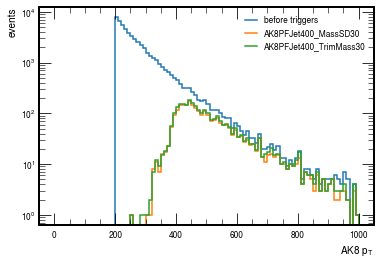

In [4]:
with open(variable_file, 'rb') as f: inputdata = np.load(f)

# nominal data
datas = {}
datas["before triggers"] = inputdata

# fill after triggers
for trigger in triggers:
    
    with open(trigger + ".npy", 'rb') as f: triggerdata = np.load(f)
    
    datas[trigger] = inputdata[triggerdata]


plotHistograms(datas, variable=r"AK8 $p_{T}$")